<a href="https://www.kaggle.com/code/pujeeta/shopping-trend?scriptVersionId=154414807" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
#information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [3]:
#check for null values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [4]:
#check for duplicate values
df.duplicated().sum()

0

In [5]:
#Purchases By Gender 
gender_counts= df['Gender'].value_counts()
gender_counts

Gender
Male      2652
Female    1248
Name: count, dtype: int64

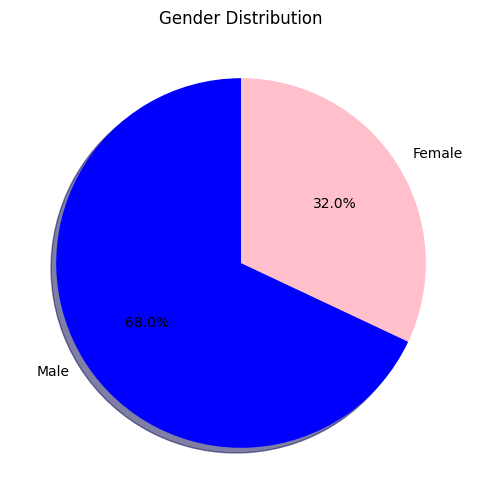

In [6]:
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'], shadow= True)
plt.title('Gender Distribution')
plt.show()

In [7]:
#counting categories of purchase
categories= df['Category'].value_counts().reset_index()
categories

,Category,count
0,Clothing,1737
1,Accessories,1240
2,Footwear,599
3,Outerwear,324


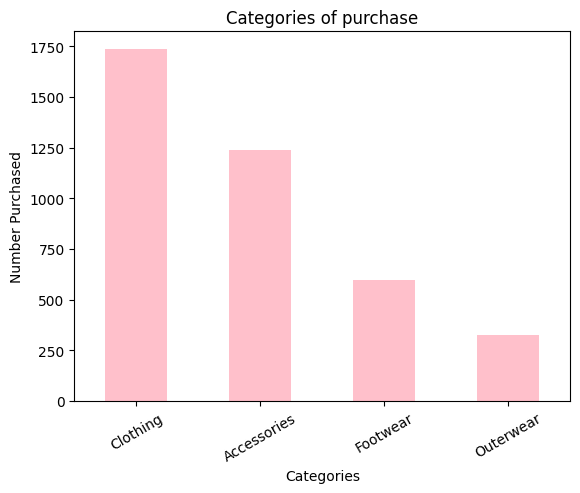

In [8]:
#Visuals for categories of purchase
categories.plot(x='Category', y='count', kind='bar', legend=False, color='pink')
plt.title('Categories of purchase')
plt.xticks(rotation = 30) # Rotates X-Axis Ticks by 30-degrees
plt.xlabel('Categories')
plt.ylabel('Number Purchased')
plt.show()

In [9]:
#Amount spent based on Gender
amount= df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
amount

,Gender,Purchase Amount (USD)
0,Female,75191
1,Male,157890


In [10]:
#Purchase trend between age

#define bins and lables
bins = [18, 35, 55, 70, float('inf')]
labels = ['19-35', '36-55', '55-70', '71+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_summary = df.groupby('AgeGroup')['Purchase Amount (USD)'].sum().reset_index()
age_group_summary

,AgeGroup,Purchase Amount (USD)
0,19-35,74658
1,36-55,88833
2,55-70,65780
3,71+,3810


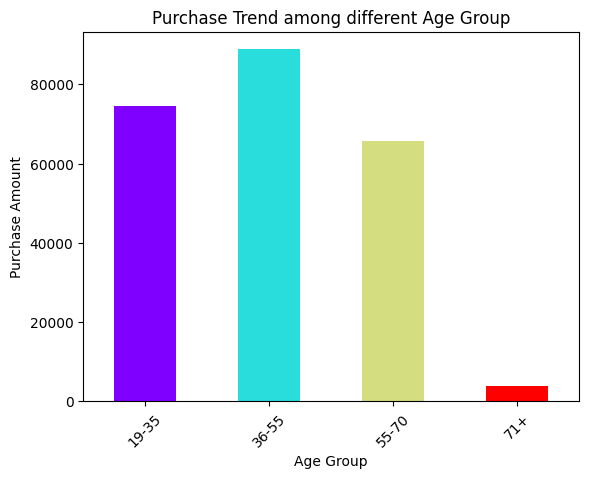

In [11]:
#Visualize the age category
colors= plt.cm.rainbow(np.linspace(0,1, len(age_group_summary)))
age_group_summary.plot(x='AgeGroup', y='Purchase Amount (USD)', kind='bar', legend=False, color=colors)
plt.title('Purchase Trend among different Age Group')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

In [12]:
#payment method used
payment_methods = df['Payment Method'].unique()
count_method= df['Payment Method'].value_counts().reset_index()
#count_method = count_method.astype(float)
count_method

,Payment Method,count
0,PayPal,677
1,Credit Card,671
2,Cash,670
3,Debit Card,636
4,Venmo,634
5,Bank Transfer,612


<Figure size 2000x600 with 0 Axes>

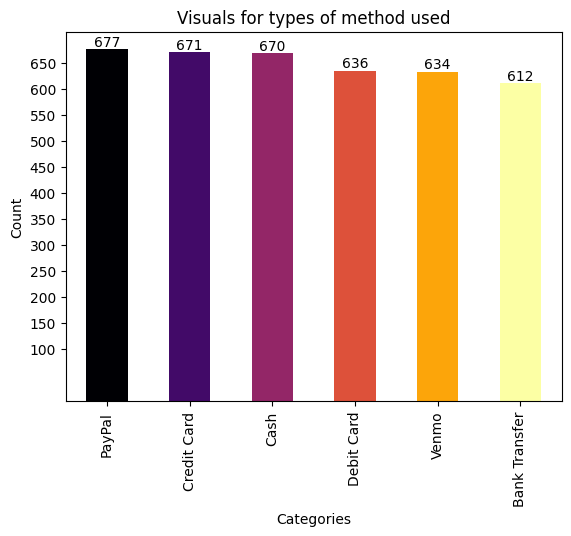

In [13]:
 #visuals for payment method used
plt.figure(figsize = (20, 6))
colors = plt.cm.inferno(np.linspace(0, 1, len(count_method)))
ax= count_method.plot(kind='bar', x='Payment Method', y='count', legend=False, color=colors)
y_ticks = np.arange(100, 700, 50)
ax.set_yticks(y_ticks)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Visuals for types of method used')
plt.show()

In [14]:
#Analyse Item purchased
items = df['Item Purchased'].value_counts().reset_index()
items

,Item Purchased,count
0,Blouse,171
1,Jewelry,171
2,Pants,171
3,Shirt,169
4,Dress,166
5,Sweater,164
6,Jacket,163
7,Belt,161
8,Sunglasses,161
9,Coat,161


<Figure size 1000x800 with 0 Axes>

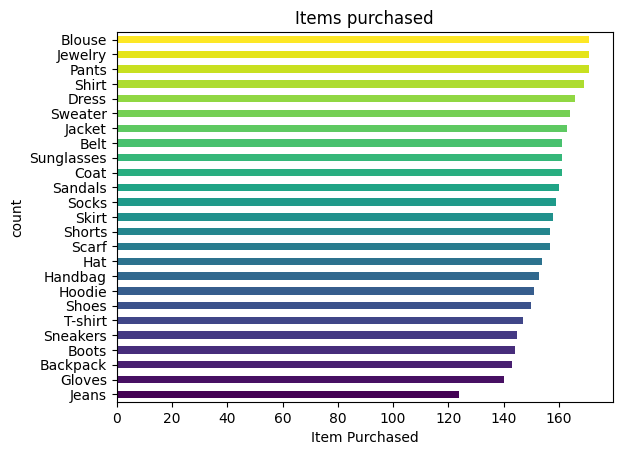

In [15]:
#Visualise Items purchased
items = items.sort_values(by='count', ascending=True)
plt.figure(figsize=(10,8))
colors= plt.cm.viridis(np.linspace(0,1, len(items)))
items.plot(kind='barh', x='Item Purchased', y='count', legend=False, color=colors)
plt.xlabel('Item Purchased')
plt.ylabel('count')
plt.title('Items purchased')
plt.show()

In [16]:
#Season for purchase
Season=df['Season'].value_counts()
Season

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

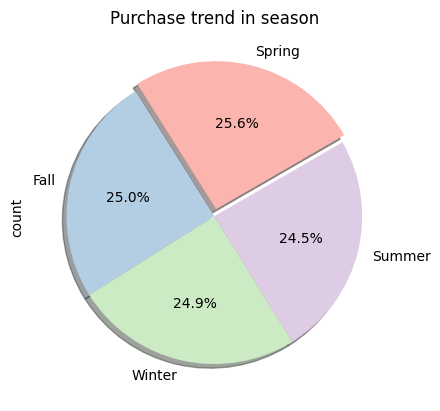

In [17]:
#Visualise season
colors = plt.cm.Pastel1(range(len(df)))
explode=[0.05,0,0,0]
Season.plot(kind='pie',colors=colors,startangle=30, explode=explode, shadow=True, title='Purchase trend in season',autopct='%1.1f%%')
plt.show()